In [6]:
import numpy as np 

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A, e_Z.sum


In [10]:
a = np.exp(1) + np.exp(2) + np.exp(4) + np.exp(3)

np.exp(1) / a

0.03205860328008499

In [11]:
z = [1,2,4,3]
softmax(z)

(array([0.0320586 , 0.08714432, 0.64391426, 0.23688282]),
 <function ndarray.sum>)

In [12]:
import numpy as np 

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))

In [15]:
import numpy as np 

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [16]:
## One-hot coding
from scipy import sparse 
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)

In [17]:
# cost or loss function  
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d, C)

def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)
    
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))

1.4013183623740134e-10


In [18]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
# W[-1] is the solution, W is all history of weights

In [19]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [22]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint
X = np.concatenate((X0, X1, X2), axis = 0).T 
# extended data
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [23]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.41390002 -4.38340966 -4.78389349]
 [-1.05785525  1.40350341 -1.13354571]
 [-1.72586136 -1.75057532  1.30891687]]


d:\ana\envs\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


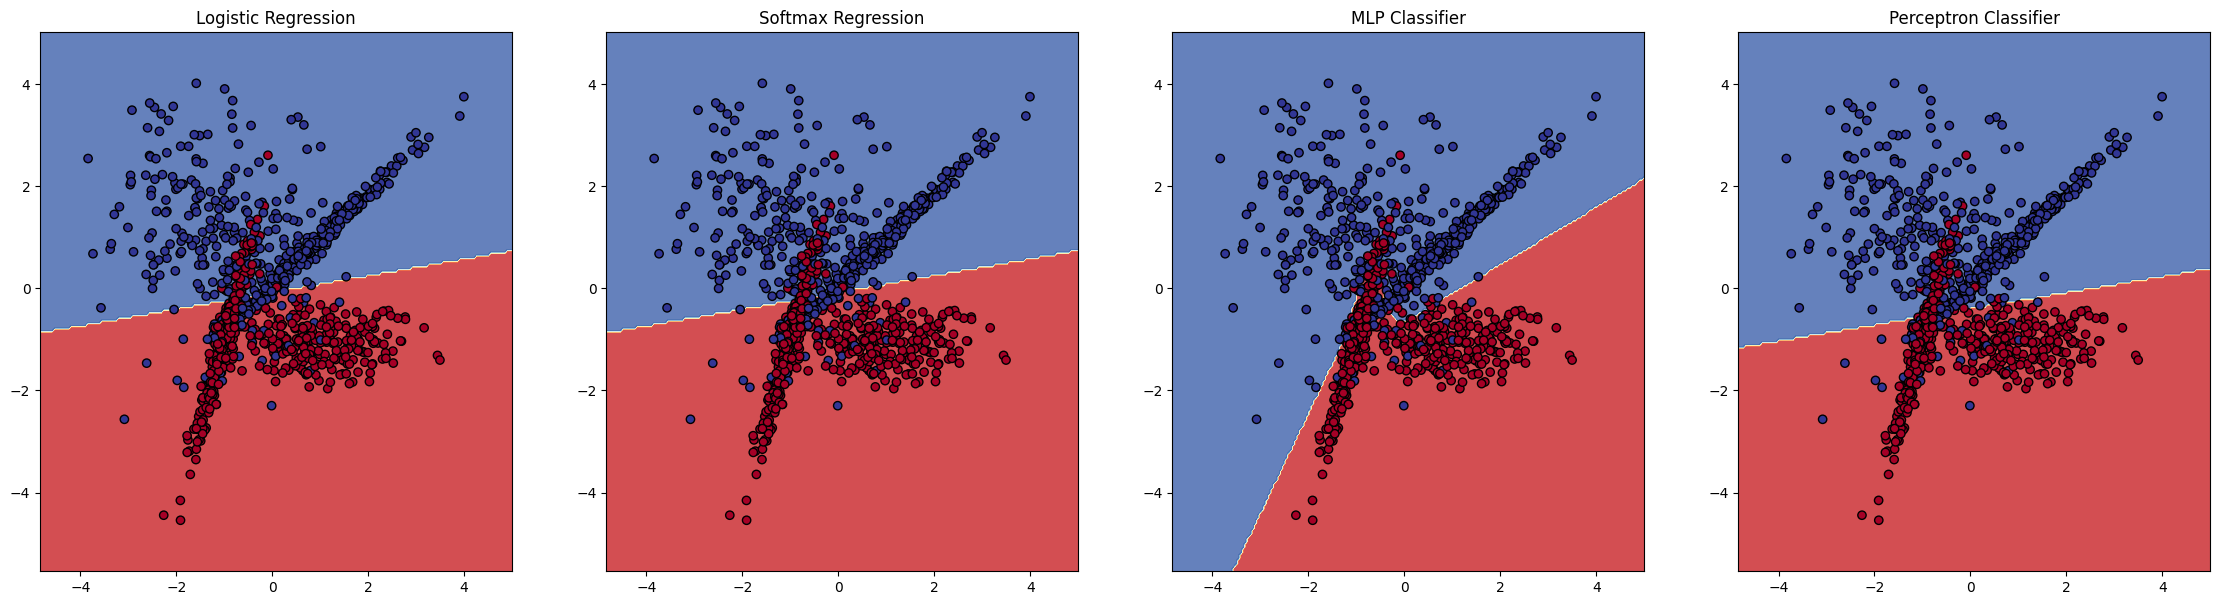

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# 1. Tạo dữ liệu ngẫu nhiên
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# 2. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Định nghĩa mô hình Logistic Regression, Softmax Regression, MLP và Perceptron
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)
perceptron = Perceptron(max_iter=1000, random_state=42)

# 4. Huấn luyện mô hình
log_reg.fit(X_train, y_train)
softmax_reg.fit(X_train, y_train)
mlp.fit(X_train, y_train)
perceptron.fit(X_train, y_train)

# 5. Tạo lưới điểm để vẽ các đường phân loại
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))

# 6. Dự đoán lớp cho các điểm trong lưới
Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)

Z_softmax_reg = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_softmax_reg = Z_softmax_reg.reshape(xx.shape)

Z_mlp = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_mlp = Z_mlp.reshape(xx.shape)

Z_perceptron = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_perceptron = Z_perceptron.reshape(xx.shape)

# 7. Vẽ đồ thị
fig, axes = plt.subplots(1, 4, figsize=(28, 7))

# Vẽ đồ thị cho Logistic Regression
axes[0].contourf(xx, yy, Z_log_reg, alpha=0.8, cmap=plt.cm.RdYlBu)
axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
axes[0].set_title('Logistic Regression')

# Vẽ đồ thị cho Softmax Regression
axes[1].contourf(xx, yy, Z_softmax_reg, alpha=0.8, cmap=plt.cm.RdYlBu)
axes[1].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
axes[1].set_title('Softmax Regression')

# Vẽ đồ thị cho MLP
axes[2].contourf(xx, yy, Z_mlp, alpha=0.8, cmap=plt.cm.RdYlBu)
axes[2].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
axes[2].set_title('MLP Classifier')

# Vẽ đồ thị cho Perceptron
axes[3].contourf(xx, yy, Z_perceptron, alpha=0.8, cmap=plt.cm.RdYlBu)
axes[3].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
axes[3].set_title('Perceptron Classifier')

plt.show()

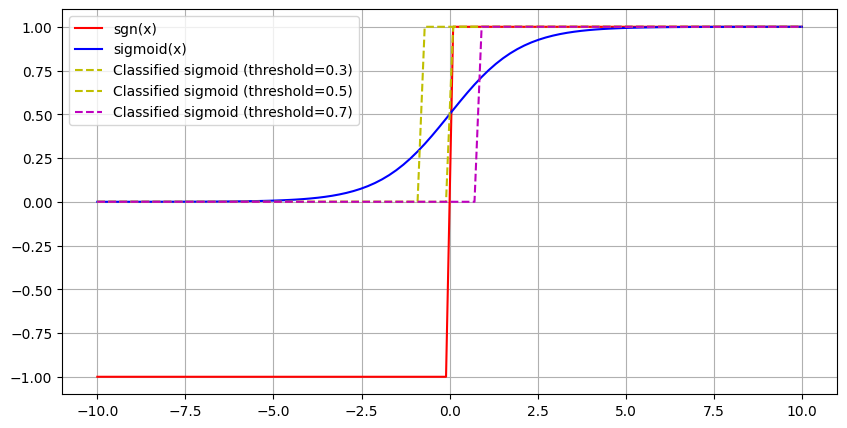

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Hàm sgn
def sgn(x):
    return np.where(x >= 0, 1, -1)

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm phân loại dựa trên ngưỡng
def classify_sigmoid(x, threshold=0.5):
    return np.where(sigmoid(x) >= threshold, 1, 0)

# Tạo mảng giá trị x
x = np.linspace(-10, 10, 100)

# Tính giá trị của hàm sgn và sigmoid
y_sgn = sgn(x)
y_sigmoid = sigmoid(x)

# Phân loại với ngưỡng sigmoid khác nhau
thresholds = [0.3, 0.5, 0.7]
y_class_03 = classify_sigmoid(x, 0.3)
y_class_05 = classify_sigmoid(x, 0.5)
y_class_07 = classify_sigmoid(x, 0.7)

# Vẽ đồ thị
plt.figure(figsize=(10, 5))
plt.plot(x, y_sgn, label='sgn(x)', color='r')
plt.plot(x, y_sigmoid, label='sigmoid(x)', color='b')

# Vẽ các ngưỡng phân loại
plt.plot(x, y_class_03, label='Classified sigmoid (threshold=0.3)', color='y', linestyle='--')
plt.plot(x, y_class_05, label='Classified sigmoid (threshold=0.5)', color='y', linestyle='--')
plt.plot(x, y_class_07, label='Classified sigmoid (threshold=0.7)', color='m', linestyle='--')

# Hiển thị nhãn và lưới
plt.legend()
plt.grid()
plt.show()

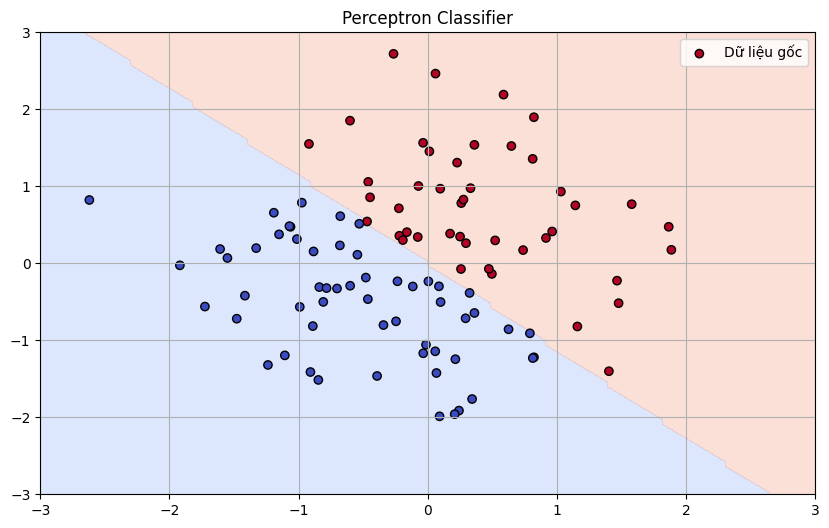

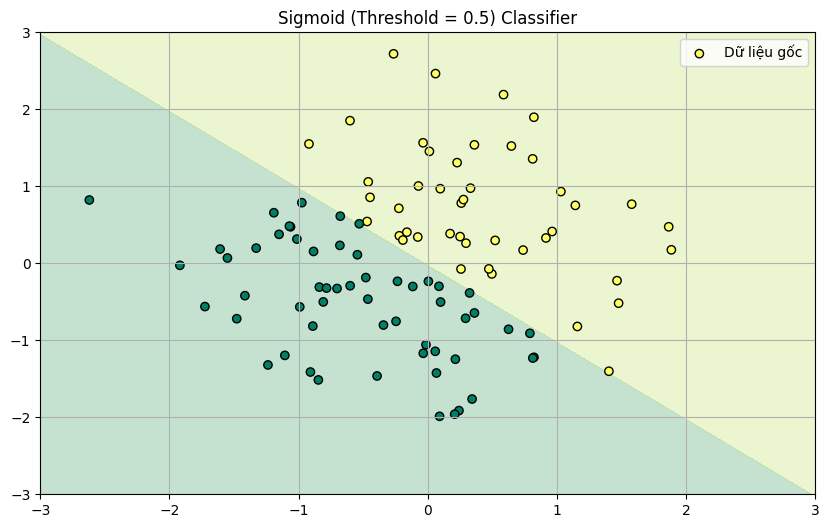

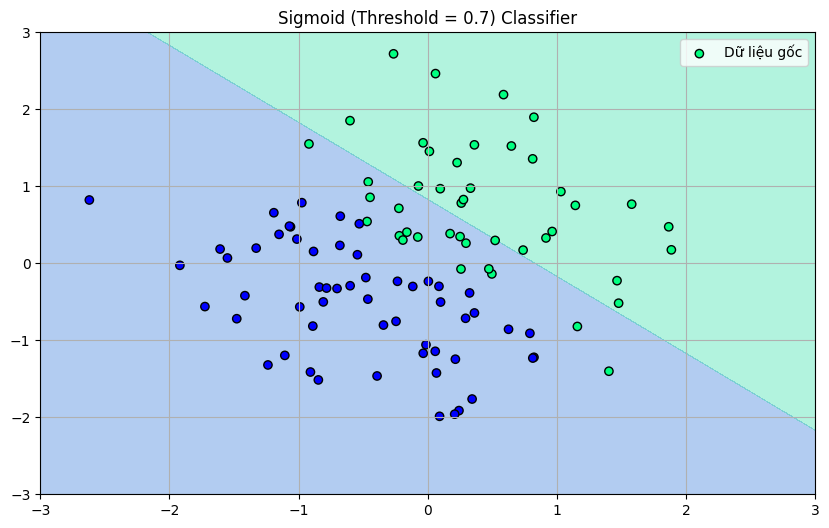

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron

# Tạo dữ liệu ngẫu nhiên
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 điểm dữ liệu 2 chiều
y = np.array([1 if x[0] + x[1] > 0 else 0 for x in X])  # Nhãn 0 và 1

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Phân loại với ngưỡng sigmoid
def classify_sigmoid(x, threshold=0.5):
    return np.where(sigmoid(x) >= threshold, 1, 0)

# Đào tạo Perceptron
perceptron = Perceptron()
perceptron.fit(X, y)

# Dự đoán với Perceptron
y_perceptron = perceptron.predict(X)

# Tạo lưới các điểm để vẽ
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Dự đoán với perceptron cho lưới
Z_perceptron = perceptron.predict(grid_points).reshape(xx.shape)

# Dự đoán với sigmoid và ngưỡng 0.5, 0.7
Z_sigmoid_05 = classify_sigmoid(xx.ravel() + yy.ravel(), 0.5).reshape(xx.shape)
Z_sigmoid_07 = classify_sigmoid(xx.ravel() + yy.ravel(), 0.7).reshape(xx.shape)

# Vẽ biểu đồ 1: Perceptron
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_perceptron, alpha=0.3, cmap='coolwarm', levels=[-0.1, 0.5, 1.1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', label='Dữ liệu gốc')
plt.title('Perceptron Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ 2: Sigmoid với ngưỡng 0.5
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_sigmoid_05, alpha=0.3, cmap='summer', levels=[0, 0.5, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer', edgecolors='k', marker='o', label='Dữ liệu gốc')
plt.title('Sigmoid (Threshold = 0.5) Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ 3: Sigmoid với ngưỡng 0.7
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_sigmoid_07, alpha=0.3, cmap='winter', levels=[0, 0.7, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k', marker='o', label='Dữ liệu gốc')
plt.title('Sigmoid (Threshold = 0.7) Classifier')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
from sklearn.neural_network import MLPClassifier

# Tạo dữ liệu mẫu (dữ liệu giả)
X = [[0., 0.], [1., 1.]]
y = [0, 1]  # Nhãn

# Tạo MLP với 1 lớp ẩn (10 nơ-ron) và hàm kích hoạt 'relu'
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)

# Huấn luyện mô hình
mlp.fit(X, y)

# Dự đoán kết quả
y_pred = mlp.predict([[2., 2.]])
print("Dự đoán:", y_pred)


Dự đoán: [1]
